In [1]:
import pandas as pd
import numpy as np
loan=pd.read_csv('Data file.csv')

In [2]:
loan.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

#### Observation:
    * label - Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
    * msisdn - mobile number of user
    * aon - age on cellular network in days
    * daily_decr30 - Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
    * daily_decr90 - Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
    * rental30 - Average main account balance over last 30 days
    * rental90 - Average main account balance over last 90 days
    * last_rech_date_ma - Number of days till last recharge of main account
    * last_rech_date_da - Number of days till last recharge of data account
    * last_rech_amt_ma - Amount of last recharge of main account (in Indonesian Rupiah)
    * cnt_ma_rech30 - Number of times main account got recharged in last 30 days
    * fr_ma_rech30 - Frequency of main account recharged in last 30 days
    * sumamnt_ma_rech30 - Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
    * medianamnt_ma_rech30 - Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
    * medianmarechprebal30 - Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
    * cnt_ma_rech90 - Number of times main account got recharged in last 90 days
    * fr_ma_rech90 - Frequency of main account recharged in last 90 days
    * sumamnt_ma_rech90 - Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
    * medianamnt_ma_rech90 - Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
    * medianmarechprebal90 - Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
    * cnt_da_rech30 - Number of times data account got recharged in last 30 days
    * fr_da_rech30 - Frequency of data account recharged in last 30 days
    * cnt_da_rech90 - Number of times data account got recharged in last 90 days
    * fr_da_rech90 - Frequency of data account recharged in last 90 days
    * cnt_loans30 - Number of loans taken by user in last 30 days
    * amnt_loans30 - Total amount of loans taken by user in last 30 days
    * maxamnt_loans30 - maximum amount of loan taken by the user in last 30 days
    * medianamnt_loans30 - Median of amounts of loan taken by the user in last 30 days
    * cnt_loans90 - Number of loans taken by user in last 90 days
    * amnt_loans90 - Total amount of loans taken by user in last 90 days
    * maxamnt_loans90 - maximum amount of loan taken by the user in last 90 days
    * medianamnt_loans90 - Median of amounts of loan taken by the user in last 90 days
    * payback30 - Average payback time in days over last 30 days
    * payback90 - Average payback time in days over last 90 days
    * pcircle - telecom circle
    * pdate - date


In [3]:
#let us check data types
loan.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

#### Observation:
    Columns Like msisdn,pcircle,pdate are Object data type remaining columns are numeric type i.e., int and float data type.
    

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

#### Observation:
    * Float data type columns are 21
    * int data type columns are 13
    * object data type columns are 3

In [5]:
loan.shape

(209593, 37)

##### Observation:
    There total 209593 rows and 37 columns

In [6]:
#let us check unique values in each column
for column in loan.columns:
    print(f"{column}: Number of unique values {loan[column].nunique()}")
    print('------------------------------------------------------------')

Unnamed: 0: Number of unique values 209593
------------------------------------------------------------
label: Number of unique values 2
------------------------------------------------------------
msisdn: Number of unique values 186243
------------------------------------------------------------
aon: Number of unique values 4507
------------------------------------------------------------
daily_decr30: Number of unique values 147026
------------------------------------------------------------
daily_decr90: Number of unique values 158670
------------------------------------------------------------
rental30: Number of unique values 132148
------------------------------------------------------------
rental90: Number of unique values 141033
------------------------------------------------------------
last_rech_date_ma: Number of unique values 1186
------------------------------------------------------------
last_rech_date_da: Number of unique values 1174
----------------------------------

#### Observation:
    * Unnamed: 0 is unnecessary column in data . Hence we can drop that column 
    * Our target variable is Label which has 2 unique values , Hence it is Logistic regresssion problem (classification problem)
    * pcircle has only one value, that means all customers same telecom circle, Hence we can dorp it.
    * columns like medianamnt_loans90,medianamnt_loans30 have only 6 values and maxamnt_loans90 have only 3 unique values .We have to be careful while dealing with null values in these columns because mean dosen't work in these columns we have to use most_frequent or median .
    * Remaining all columns have multiple values.

In [7]:
#let us drop Unnamed: 0
loan=loan.drop(['Unnamed: 0'],axis=1)

In [8]:
loan.tail()

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
209588      1  22758I85348   404.0    151.872333    151.872333   1089.19   
209589      1  95583I84455  1075.0     36.936000     36.936000   1728.36   
209590      1  28556I85350  1013.0  11843.111667  11904.350000   5861.83   
209591      1  59712I82733  1732.0  12488.228333  12574.370000    411.83   
209592      1  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
209588   1089.19                1.0                0.0              4048  ...   
209589   1728.36                4.0                0.0               773  ...   
209590   8893.20                3.0                0.0              1539  ...   
209591    984.58                2.0               38.0               773  ...   
209592    631.20               13.0                0.0              7526  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
209588                6                 0.0        1.0   1.000000      UPW   
209589                6                 0.0        1.0   1.000000      UPW   
209590               12                 0.0        4.0   3.833333      UPW   
209591               12                 0.0        0.0  10.500000      UPW   
209592               12                 0.0        0.0   0.000000      UPW   

             pdate  
209588  2016-06-17  
209589  2016-06-12  
209590  2016-07-29  
209591  2016-07-25  
209592  2016-07-07  

[5 rows x 36 columns]

#### Observation:
    * unnamed : 0 is column is droped
    * we can observe that in msisdn for us it is given as number but it contains alphabatical value "I" . we have to separate by using split function we have convert it into int or float
    * date column also we have split and convert that into int or float

In [9]:
loan[['msisdn1','msisdn2']]=loan["msisdn"].str.split("I",expand=True)

In [10]:
loan[['year','month','day']]=loan['pdate'].str.split("-",expand=True)

##### Observation:
    pdate and msisdn columns are splited.

In [11]:
loan.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
4      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0                2.0                0.0              1539  ...   
1               20.0                0.0              5787  ...   
2                3.0                0.0              1539  ...   
3               41.0                0.0               947  ...   
4                4.0                0.0              2309  ...   

   medianamnt_loans90  payback30  payback90  pcircle       pdate  msisdn1  \
0                 0.0  29.000000  29.000000      UPW  2016-07-20    21408   
1                 0.0   0.000000   0.000000      UPW  2016-08-10    76462   
2                 0.0   0.000000   0.000000      UPW  2016-08-19    17943   
3                 0.0   0.000000   0.000000      UPW  2016-06-06    55773   
4                 0.0   2.333333   2.333333      UPW  2016-06-22    03813   

   msisdn2  year  month  day  
0    70789  2016     07   20  
1    70374  2016     08   10  
2    70372  2016     08   19  
3    70781  2016     06   06  
4    82730  2016     06   22  

[5 rows x 41 columns]

In [12]:
#converting object type to numeric tyope
list1=['msisdn1','msisdn2','year','month','day']
for i in list1:
    loan[i]=pd.to_numeric(loan[i])

In [13]:
#now let us check if they are converted into numeric or not
loan.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

##### Observation:
    All data values are converted into numeric  type

In [14]:
#checking how many unique values are there in year
loan['year'].unique()

array([2016], dtype=int64)

##### Observation:
    There is only one unique value

In [15]:
#msisdn ,pcricle, pdate,year have one unique value or we have splited them. Hence we are droping them. 
loan=loan.drop(['msisdn','pcircle','pdate','year'],axis=1)

In [16]:
loan.tail()

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        ...  cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
209588  ...          2.0            12                6                 0.0   
209589  ...          3.0            18                6                 0.0   
209590  ...          6.0            54               12                 0.0   
209591  ...          3.0            24               12                 0.0   
209592  ...          2.0            18               12                 0.0   

        payback30  payback90  msisdn1  msisdn2  month  day  
209588        1.0   1.000000    22758    85348      6   17  
209589        1.0   1.000000    95583    84455      6   12  
209590        4.0   3.833333    28556    85350      7   29  
209591        0.0  10.500000    59712    82733      7   25  
209592        0.0   0.000000    65061    85339      7    7  

[5 rows x 37 columns]

### Checking for missing values

In [17]:
#checking for null values
loan.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
msisdn1                 0
msisdn2                 0
month                   0
day                     0
dtype: int64

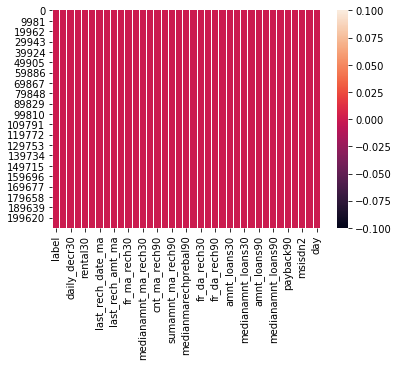

In [18]:
#using heatmap to check null values
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(loan.isnull())
plt.show()

#### Observation:
    Null values are no null values

### Summary Statistics

In [19]:
loan.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30  ...    cnt_loans90   amnt_loans90  \
count     209593.000000  209593.000000  ...  209593.000000  209593.000000   
mean        2064.452797       3.978057  ...      18.520919      23.645398   
std         2370.786034       4.256090  ...     224.797423      26.469861   
min            0.000000       0.000000  ...       0.000000       0.000000   
25%          770.000000       1.000000  ...       1.000000       6.000000   
50%         1539.000000       3.000000  ...       2.000000      12.000000   
75%         2309.000000       5.000000  ...       5.000000      30.000000   
max        55000.000000     203.000000  ...    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean          6.703134            0.046077       3.398826       4.321485   
std           2.103864            0.200692       8.813729      10.308108   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       0.000000       0.000000   
50%           6.000000            0.000000       0.000000       1.666667   
75%           6.000000            0.000000       3.750000       4.500000   
max          12.000000            3.000000     171.500000     171.500000   

             msisdn1        msisdn2          month           day  
count  209593.000000  209593.000000  209593.000000  209593.00000  
mean    49748.715930   84462.678797       6.797321      14.39894  
std     28905.713576    7786.046753       0.741435       8.43890  
min         4.000000   70370.000000       6.000000       1.00000  
25%     24659.000000   82733.000000       6.000000       7.00000  
50%     49056.000000   85349.000000       7.000000      14.00000  
75%     75033.000000   90583.000000       7.000000      21.00000  
max     99998.000000   99993.000000       8.000000      31.00000  

[8 rows x 37 columns]

#### Observation:
    * There is huge difference between 75% and max value in alomost all columns ,thta means Outliers are present.So i will consider above 75% are Outliers and since mean doesn't give accurate result , i will replace outliers with median that is 50%. after checking skewness i will do this step
    
    

### Checking Correlation

In [20]:
loan1=loan.corr()
loan1

label       aon  daily_decr30  daily_decr90  \
label                 1.000000 -0.003785      0.168298      0.166150   
aon                  -0.003785  1.000000      0.001104      0.000374   
daily_decr30          0.168298  0.001104      1.000000      0.977704   
daily_decr90          0.166150  0.000374      0.977704      1.000000   
rental30              0.058085 -0.000960      0.442066      0.434685   
rental90              0.075521 -0.000790      0.458977      0.471730   
last_rech_date_ma     0.003728  0.001692      0.000487      0.000908   
last_rech_date_da     0.001711 -0.001693     -0.001636     -0.001886   
last_rech_amt_ma      0.131804  0.004256      0.275837      0.264131   
cnt_ma_rech30         0.237331 -0.003148      0.451385      0.426707   
fr_ma_rech30          0.001330 -0.001163     -0.000577     -0.000343   
sumamnt_ma_rech30     0.202828  0.000707      0.636536      0.603886   
medianamnt_ma_rech30  0.141490  0.004306      0.295356      0.282960   
medianmarechprebal30 -0.004829  0.003930     -0.001153     -0.000746   
cnt_ma_rech90         0.236392 -0.002725      0.587338      0.593069   
fr_ma_rech90          0.084385  0.004401     -0.078299     -0.079530   
sumamnt_ma_rech90     0.205793  0.001011      0.762981      0.768817   
medianamnt_ma_rech90  0.120855  0.004909      0.257847      0.250518   
medianmarechprebal90  0.039300 -0.000859      0.037495      0.036382   
cnt_da_rech30         0.003827  0.001564      0.000700      0.000661   
fr_da_rech30         -0.000027  0.000892     -0.001499     -0.001570   
cnt_da_rech90         0.002999  0.001121      0.038814      0.031155   
fr_da_rech90         -0.005418  0.005395      0.020673      0.016437   
cnt_loans30           0.196283 -0.001826      0.366116      0.340387   
amnt_loans30          0.197272 -0.001726      0.471492      0.447869   
maxamnt_loans30       0.000248 -0.002764     -0.000028      0.000025   
medianamnt_loans30    0.044589  0.004664     -0.011610     -0.005591   
cnt_loans90           0.004733 -0.000611      0.008962      0.009446   
amnt_loans90          0.199788 -0.002319      0.563496      0.567204   
maxamnt_loans90       0.084144 -0.001191      0.400199      0.397251   
medianamnt_loans90    0.035747  0.002771     -0.037305     -0.034686   
payback30             0.048336  0.001940      0.026915      0.019400   
payback90             0.049183  0.002203      0.047175      0.040800   
msisdn1               0.001945  0.000555      0.000669      0.000903   
msisdn2               0.010204  0.000482      0.011336      0.011228   
month                 0.154949 -0.001863      0.518664      0.539410   
day                   0.006825  0.000662      0.006477     -0.021508   

                      rental30  rental90  last_rech_date_ma  \
label                 0.058085  0.075521           0.003728   
aon                  -0.000960 -0.000790           0.001692   
daily_decr30          0.442066  0.458977           0.000487   
daily_decr90          0.434685  0.471730           0.000908   
rental30              1.000000  0.955237          -0.001095   
rental90              0.955237  1.000000          -0.001688   
last_rech_date_ma    -0.001095 -0.001688           1.000000   
last_rech_date_da     0.003261  0.002794           0.001790   
last_rech_amt_ma      0.127271  0.121416          -0.000147   
cnt_ma_rech30         0.233343  0.230260           0.004311   
fr_ma_rech30         -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30     0.272649  0.259709           0.002105   
medianamnt_ma_rech30  0.129853  0.120242          -0.001358   
medianmarechprebal30 -0.001415 -0.001237           0.004071   
cnt_ma_rech90         0.312118  0.345293           0.004263   
fr_ma_rech90         -0.033530 -0.036524           0.001414   
sumamnt_ma_rech90     0.342306  0.360601           0.002243   
medianamnt_ma_rech90  0.110356  0.103151          -0.000726   
medianmarechprebal90  0.027170  0.029547          -0.001086   
cnt_da_rech30        -0.0011

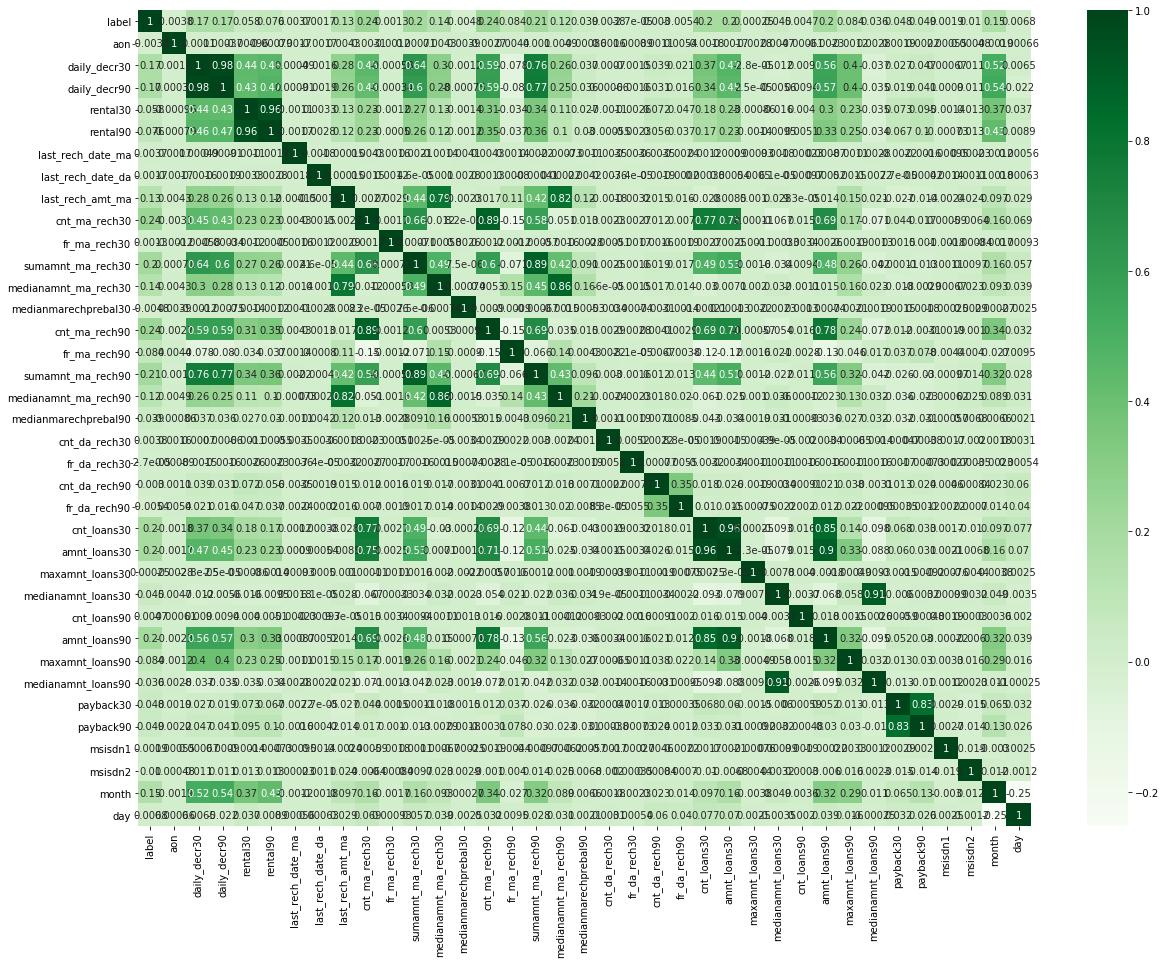

In [21]:
plt.figure(figsize=(20,15))
sns.heatmap(loan1,annot=True,cmap='Greens')
plt.show()

#### Observation:
    Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables

### Data visualization

### Univariate Analysis

In [22]:
# checking count of label
plt.subplots(figsize=(10,8))
sns.countplot(x='label',data=loan)
plt.title('count of loan')
plt.xlabel('Yes=1,No=0')
plt.ylabel('count')
plt.show()

print(loan['label'].value_counts())

1    183431
0     26162
Name: label, dtype: int64


#### Observation:
    Our target variable is biased

In [23]:
# medianamnt_loans30 plotting
plt.subplots(figsize=(10,6))
sns.countplot(x='medianamnt_loans30',data=loan)
plt.title('medianamnt_loans30')
plt.xticks(rotation=20)
plt.show()

print(loan['medianamnt_loans30'].value_counts())

0.0    195445
1.0      7149
0.5      6538
2.0       420
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64


#### Observation:
    0.0 are highest in count and 3.0 is lowest in count

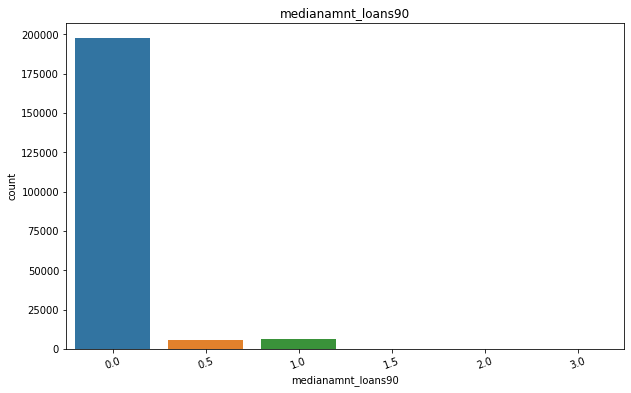

0.0    197424
1.0      6172
0.5      5668
2.0       307
1.5        19
3.0         3
Name: medianamnt_loans90, dtype: int64


In [24]:
# medianamnt_loans90 plotting
plt.subplots(figsize=(10,6))
sns.countplot(x='medianamnt_loans90',data=loan)
plt.title('medianamnt_loans90')
plt.xticks(rotation=20)
plt.show()

print(loan['medianamnt_loans90'].value_counts())

#### Observation:
    0.0 are highest in count and 3.0 is lowest in count. 
    We can also observe that medianamnt_loans90 and medianamnt_loans30 are nearly same .

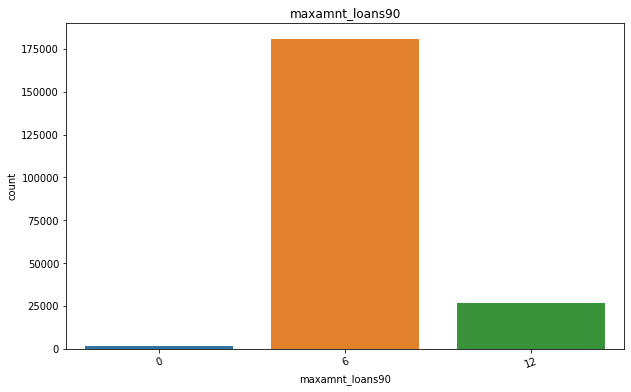

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64


In [25]:
# maxamnt_loans90 plotting
plt.subplots(figsize=(10,6))
sns.countplot(x='maxamnt_loans90',data=loan)
plt.title('maxamnt_loans90')
plt.xticks(rotation=20)
plt.show()

print(loan['maxamnt_loans90'].value_counts())

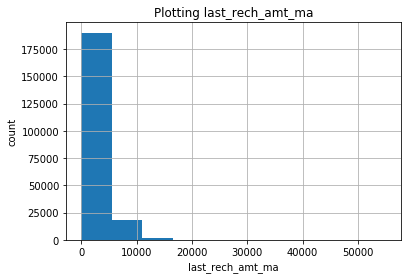

In [26]:
loan['last_rech_amt_ma'].hist()
plt.xlabel('last_rech_amt_ma')
plt.ylabel('count')
plt.title('Plotting last_rech_amt_ma')
plt.show()

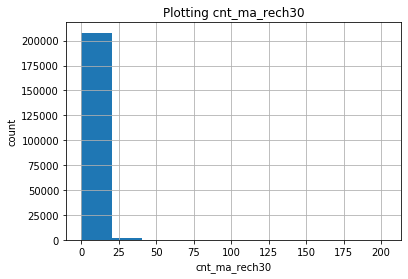

In [27]:
loan['cnt_ma_rech30'].hist()
plt.xlabel('cnt_ma_rech30')
plt.ylabel('count')
plt.title('Plotting cnt_ma_rech30')
plt.show()

### Bivariate Analysis

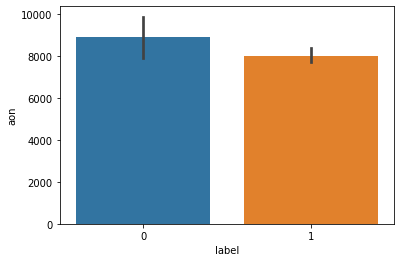

In [28]:
sns.barplot(x='label',y='aon',data=loan)
plt.show()

In [29]:
sns.barplot(x='label',y='daily_decr30',data=loan)
plt.show()

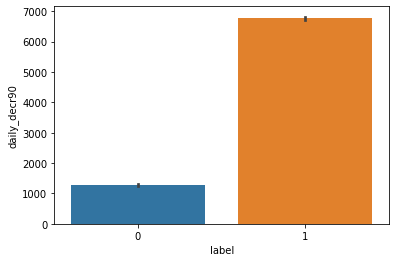

In [30]:
sns.barplot(x='label',y='daily_decr90',data=loan)
plt.show()

In [31]:
sns.barplot(x='label',y='rental30',data=loan)
plt.show()

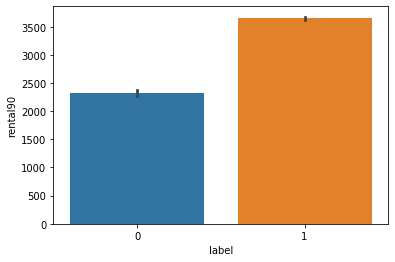

In [32]:
sns.barplot(x='label',y='rental90',data=loan)
plt.show()

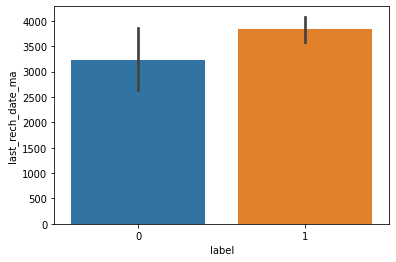

In [33]:
sns.barplot(x='label',y='last_rech_date_ma',data=loan)
plt.show()

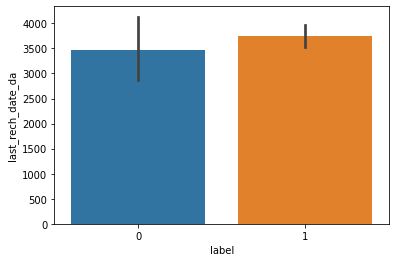

In [34]:
sns.barplot(x='label',y='last_rech_date_da',data=loan)
plt.show()

In [35]:
sns.barplot(x='label',y='last_rech_amt_ma',data=loan)
plt.show()

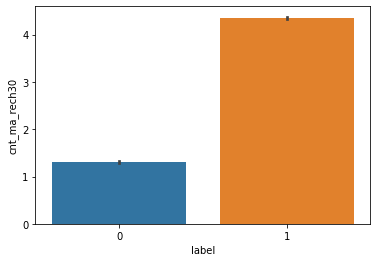

In [36]:
sns.barplot(x='label',y='cnt_ma_rech30',data=loan)
plt.show()

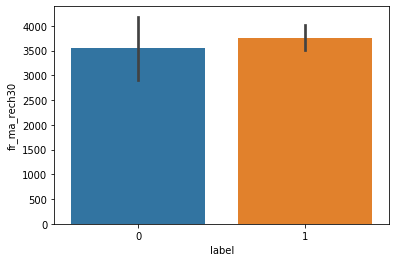

In [37]:
sns.barplot(x='label',y='fr_ma_rech30',data=loan)
plt.show()

In [38]:
sns.barplot(x='label',y='sumamnt_ma_rech30',data=loan)
plt.show()

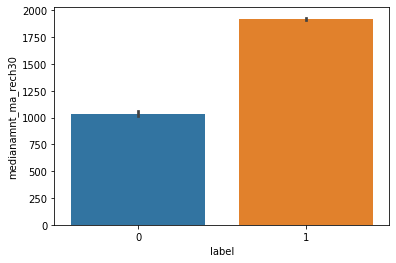

In [39]:
sns.barplot(x='label',y='medianamnt_ma_rech30',data=loan)
plt.show()

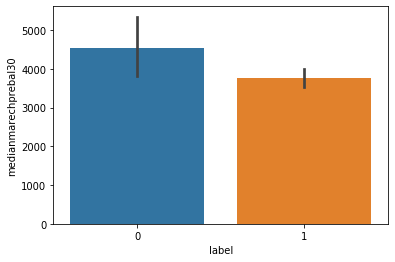

In [40]:
sns.barplot(x='label',y='medianmarechprebal30',data=loan)
plt.show()

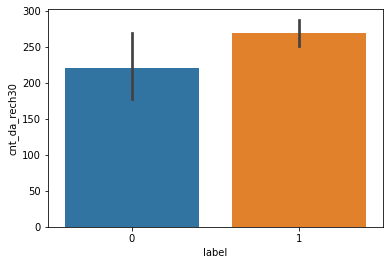

In [41]:
sns.barplot(x='label',y='cnt_da_rech30',data=loan)
plt.show()

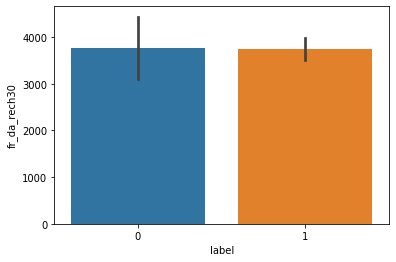

In [42]:
sns.barplot(x='label',y='fr_da_rech30',data=loan)
plt.show()

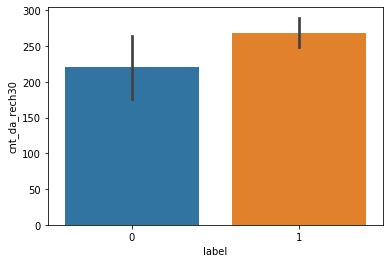

In [43]:
sns.barplot(x='label',y='cnt_da_rech30',data=loan)
plt.show()

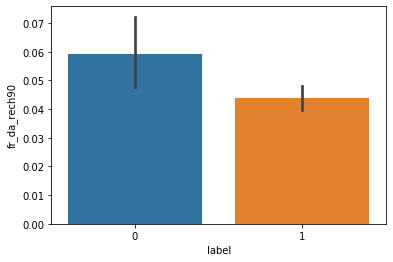

In [44]:
sns.barplot(x='label',y='fr_da_rech90',data=loan)
plt.show()

In [45]:
sns.barplot(x='label',y='cnt_loans30',data=loan)
plt.show()

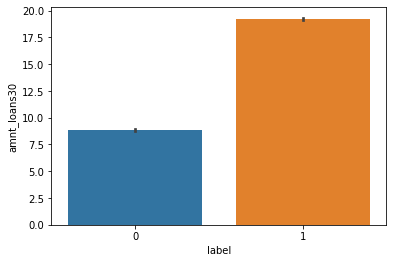

In [46]:
sns.barplot(x='label',y='amnt_loans30',data=loan)
plt.show()

In [47]:
sns.barplot(x='label',y='maxamnt_loans30',data=loan)
plt.show()

In [48]:
sns.barplot(x='label',y='medianamnt_loans30',data=loan)
plt.show()

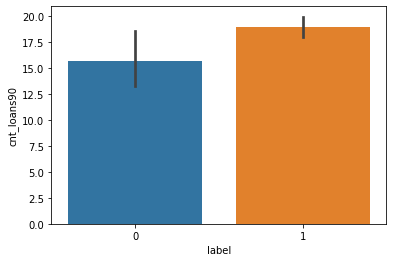

In [49]:
sns.barplot(x='label',y='cnt_loans90',data=loan)
plt.show()

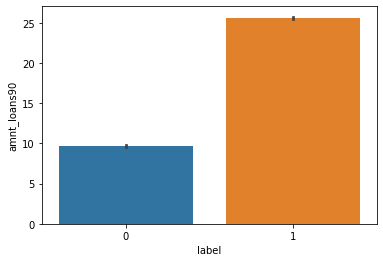

In [50]:
sns.barplot(x='label',y='amnt_loans90',data=loan)
plt.show()

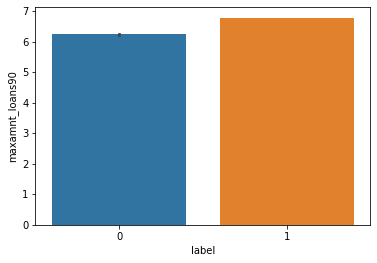

In [51]:
sns.barplot(x='label',y='maxamnt_loans90',data=loan)
plt.show()

In [52]:
sns.barplot(x='label',y='medianamnt_loans90',data=loan)
plt.show()

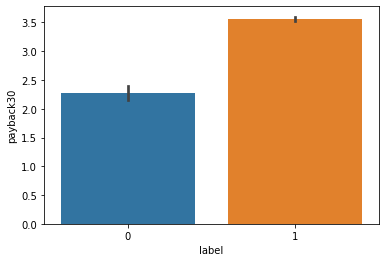

In [53]:
sns.barplot(x='label',y='payback30',data=loan)
plt.show()

In [54]:
sns.barplot(x='label',y='payback90',data=loan)
plt.show()

In [55]:
sns.barplot(x='label',y='month',data=loan)
plt.show()

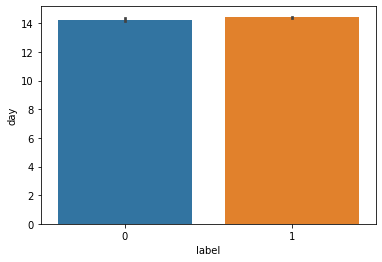

In [56]:
sns.barplot(x='label',y='day',data=loan)
plt.show()

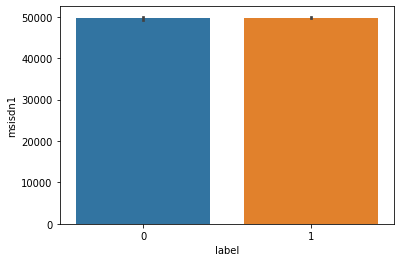

In [57]:
sns.barplot(x='label',y='msisdn1',data=loan)
plt.show()

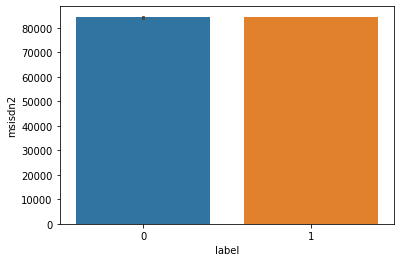

In [58]:
sns.barplot(x='label',y='msisdn2',data=loan)
plt.show()

### Checking Skewness of Data

In [59]:
loan.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

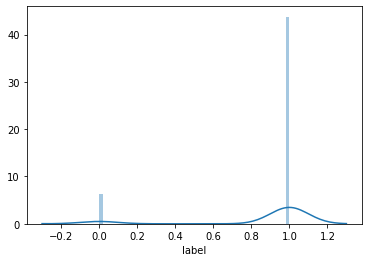

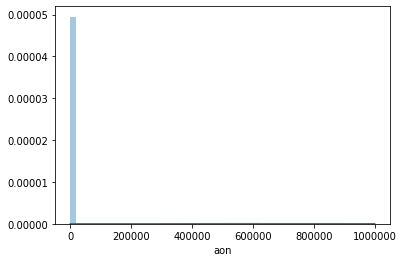

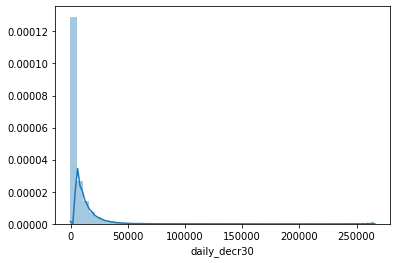

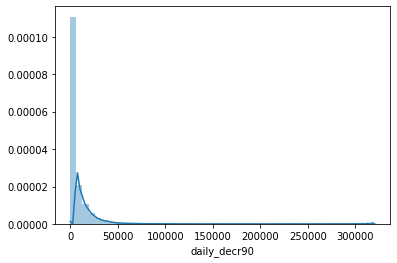

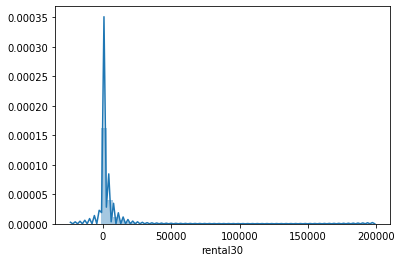

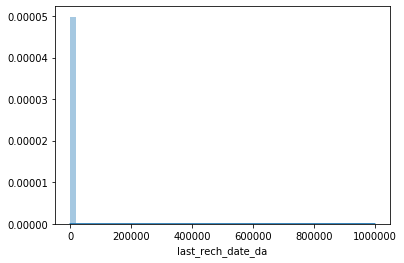

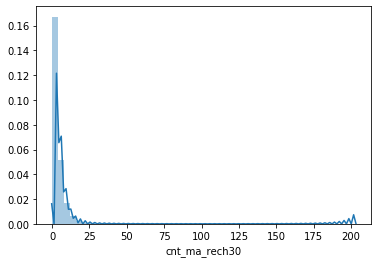

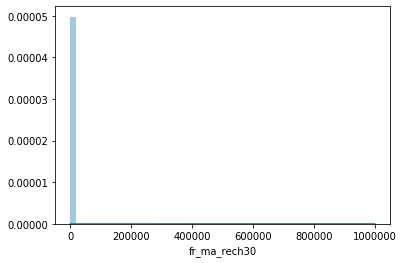

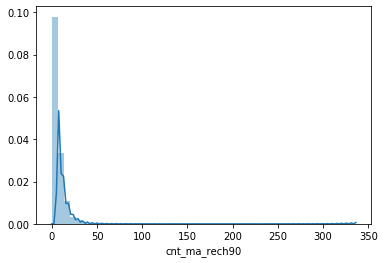

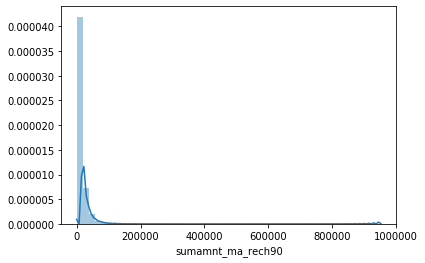

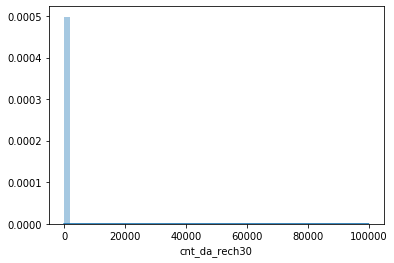

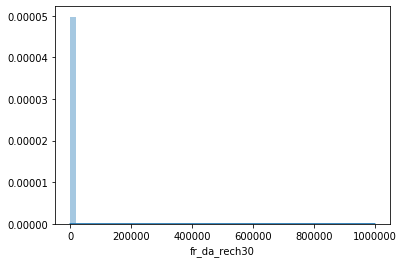

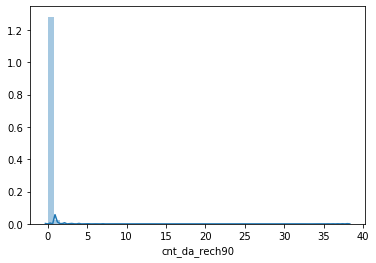

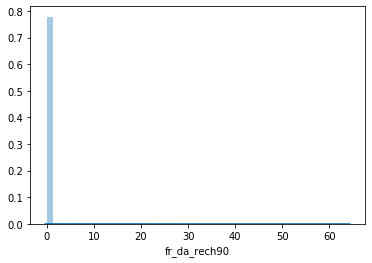

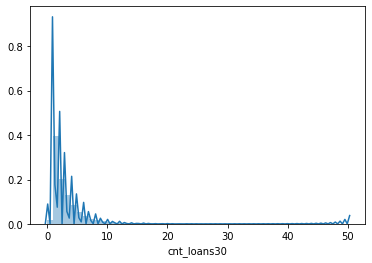

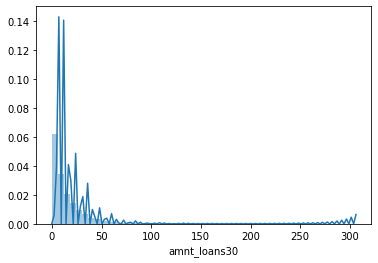

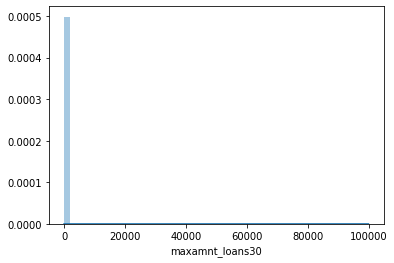

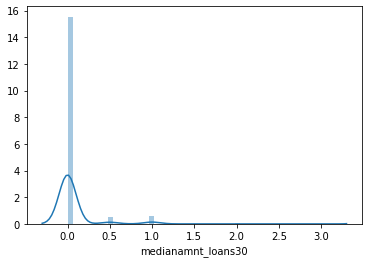

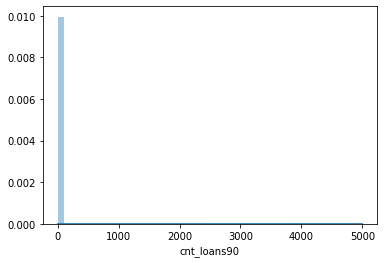

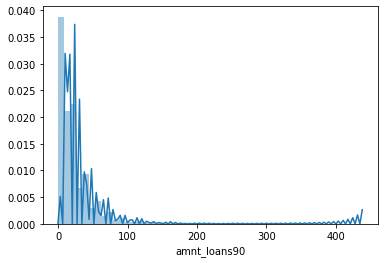

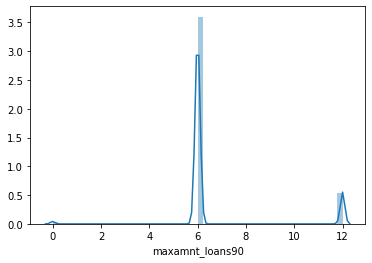

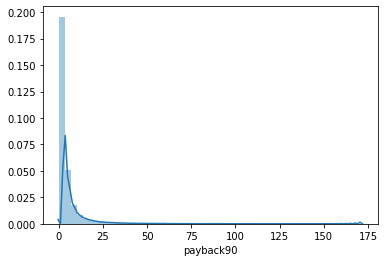

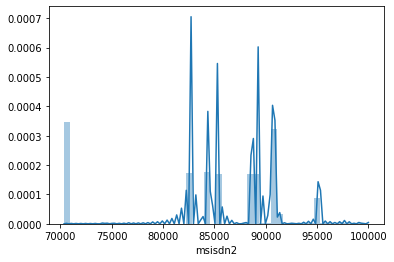

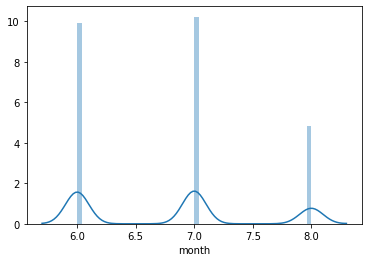

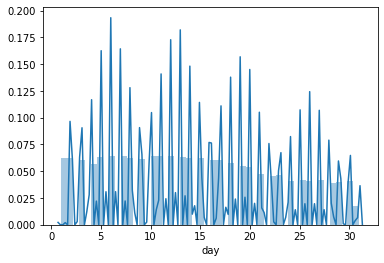

In [60]:
collist=loan.columns.values
ncol=15
nrow=10
for i in loan.columns:
    sns.distplot(loan[i],kde_kws={'bw':0.1})
    plt.show()

### Replacing Outlier with Median value 

In [61]:
with pd.option_context('display.max_columns', 37):
    print(loan.describe(include='all'))

               label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000

In [62]:
loan['aon'].values[loan['aon'] > 982] = 527
loan['aon'].values[loan['aon'] <246] = 527

In [63]:
loan['daily_decr30'].values[loan['daily_decr30'] > 7244 ] = 1469
loan['daily_decr30'].values[loan['daily_decr30'] <42 ] = 1469

In [64]:
loan['daily_decr90'].values[loan['daily_decr90'] > 7802.790000] = 1500
loan['daily_decr90'].values[loan['daily_decr90'] <42] = 1500

In [65]:
loan['rental30'].values[loan['rental30'] > 3356.940000 ] = 1083.570000 
loan['rental30'].values[loan['rental30'] < 280 ] = 1083.570000

In [66]:
loan['rental90'].values[loan['rental90'] > 4201.790000 ] = 1334
loan['rental90'].values[loan['rental90'] < 300 ] = 1334

In [67]:
loan['last_rech_date_ma'].values[loan['last_rech_date_ma'] > 7 ] = 3
loan['last_rech_date_ma'].values[loan['last_rech_date_ma'] <1 ] = 3

In [68]:
# we are changing Number of days till last recharge of data account to data account recharge done or not, 0 means recharge done immediately and 1 means they have taken time to recharge

loan['last_rech_date_da'].values[loan['last_rech_date_da'] > 0] = 1
loan['last_rech_date_da'].values[loan['last_rech_date_da'] < 0] = 0

In [69]:
loan['last_rech_amt_ma'].values[loan['last_rech_amt_ma'] > 2309] = 1539

In [70]:
loan['cnt_ma_rech30'].values[loan['cnt_ma_rech30'] > 5] = 3

In [71]:
loan['fr_ma_rech30'].values[loan['fr_ma_rech30'] > 6] = 2

In [72]:
loan['sumamnt_ma_rech30'].values[loan['sumamnt_ma_rech30'] > 10010] = 4628

In [73]:
loan['medianamnt_ma_rech30'].values[loan['medianamnt_ma_rech30'] > 1924] = 1539
loan['medianamnt_ma_rech30'].values[loan['medianamnt_ma_rech30'] < 11] = 1539

In [74]:
loan['medianmarechprebal30'].values[loan['medianmarechprebal30'] > 83] =33
loan['medianmarechprebal30'].values[loan['medianmarechprebal30'] < 11] =33

In [75]:
loan['cnt_ma_rech90'].values[loan['cnt_ma_rech90'] > 8] = 4

In [76]:
loan['fr_ma_rech90'].values[loan['fr_ma_rech90'] > 8] = 2

In [77]:
loan['sumamnt_ma_rech90'].values[loan['sumamnt_ma_rech90'] > 16000] = 7226

In [78]:
loan['medianmarechprebal90'].values[loan['medianmarechprebal90'] > 79] =36
loan['medianmarechprebal90'].values[loan['medianmarechprebal90'] < 14] =36

In [79]:
# we are changing Number of times main account got recharged in last 30 days to recharge  done or not, 0 means recharge not done and 1 means recharge done 
loan['cnt_da_rech30'].values[loan['cnt_da_rech30'] > 0] =1

In [80]:
#we are changing Frequency of main account recharged in last 30 days to 0 or 1 
loan['fr_da_rech30'].values[loan['fr_da_rech30'] > 0] =1

In [81]:
# we are changing Number of times main account got recharged in last 90 days to recharge  done or not, 0 means recharge not done and 1 means recharge done 
loan['cnt_da_rech90'].values[loan['cnt_da_rech90'] > 0] =1

In [82]:
loan['cnt_loans30'].values[loan['cnt_loans30'] > 4] =2

In [83]:
loan['amnt_loans30'].values[loan['amnt_loans30'] > 24] =12

In [84]:
loan['maxamnt_loans30'].values[loan['maxamnt_loans30'] > 6] =6

In [85]:
loan['cnt_loans90'].values[loan['cnt_loans90'] > 5] =2

In [86]:
loan['amnt_loans90'].values[loan['amnt_loans90'] > 30] =12

In [87]:
loan['payback30'].values[loan['payback30']>3]=0

In [88]:
loan['payback90'].values[loan['payback90']>4]=1.66666

In [89]:
loan.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177     541.240194    1810.563417    1876.304580   
std         0.330519     148.953527    1548.495916    1652.349437   
min         0.000000     246.000000      42.000000      42.000000   
25%         1.000000     526.000000    1445.000000    1466.870000   
50%         1.000000     527.000000    1469.000000    1500.000000   
75%         1.000000     527.000000    1469.175667    1500.000000   
max         1.000000     982.000000    7244.000000    7802.100000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     1193.868837    1477.572672           2.893517           0.032053   
std       601.617256     776.622935           1.524664           0.176140   
min       280.000000     300.000000           1.000000           0.000000   
25%      1082.380000    1327.350000           2.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      1083.570000    1334.000000           3.000000           0.000000   
max      3356.940000    4201.790000           7.000000           1.000000   

       last_rech_amt_ma  cnt_ma_rech30  ...    cnt_loans90   amnt_loans90  \
count     209593.000000  209593.000000  ...  209593.000000  209593.000000   
mean        1218.606867       2.343246  ...       2.079044      12.646711   
std          604.625067       1.424450  ...       1.161395       6.936504   
min            0.000000       0.000000  ...       0.000000       0.000000   
25%          770.000000       1.000000  ...       1.000000       6.000000   
50%         1539.000000       3.000000  ...       2.000000      12.000000   
75%         1539.000000       3.000000  ...       3.000000      18.000000   
max         2309.000000       5.000000  ...       5.000000      30.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean          6.703134            0.046077       0.409385       1.153689   
std           2.103864            0.200692       0.879028       1.191463   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       0.000000       0.000000   
50%           6.000000            0.000000       0.000000       1.666660   
75%           6.000000            0.000000       0.000000       1.666660   
max          12.000000            3.000000       3.000000       4.000000   

             msisdn1        msisdn2          month           day  
count  209593.000000  209593.000000  209593.000000  209593.00000  
mean    49748.715930   84462.678797       6.797321      14.39894  
std     28905.713576    7786.046753       0.741435       8.43890  
min         4.000000   70370.000000       6.000000       1.00000  
25%     24659.000000   82733.000000       6.000000       7.00000  
50%     49056.000000   85349.000000       7.000000      14.00000  
75%     75033.000000   90583.000000       7.000000      21.00000  
max     99998.000000   99993.000000       8.000000      31.00000  

[8 rows x 37 columns]

In [90]:
with pd.option_context('display.max_columns', 39):
    print(loan.describe(include='all'))

               label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177     541.240194    1810.563417    1876.304580   
std         0.330519     148.953527    1548.495916    1652.349437   
min         0.000000     246.000000      42.000000      42.000000   
25%         1.000000     526.000000    1445.000000    1466.870000   
50%         1.000000     527.000000    1469.000000    1500.000000   
75%         1.000000     527.000000    1469.175667    1500.000000   
max         1.000000     982.000000    7244.000000    7802.100000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     1193.868837    1477.572672           2.893517           0.032053   
std       601.617256     776.622935           1.524664           0.176140   
min       280.000000     300.000000           1.000000           0.000

In [91]:
loan.skew()

label                   -2.270254
aon                      0.743462
daily_decr30             1.639553
daily_decr90             1.714248
rental30                 1.509588
rental90                 1.489577
last_rech_date_ma        0.830611
last_rech_date_da        5.313402
last_rech_amt_ma        -0.400396
cnt_ma_rech30           -0.066264
fr_ma_rech30             0.960833
sumamnt_ma_rech30        0.234504
medianamnt_ma_rech30    -0.742814
medianmarechprebal30     1.247003
cnt_ma_rech90            0.215157
fr_ma_rech90             1.286058
sumamnt_ma_rech90        0.338035
medianamnt_ma_rech90     3.752706
medianmarechprebal90     1.018873
cnt_da_rech30            6.925820
fr_da_rech30            11.390665
cnt_da_rech90            6.006577
fr_da_rech90            28.988083
cnt_loans30              0.740992
amnt_loans30             0.701840
maxamnt_loans30         -7.850225
medianamnt_loans30       4.551043
cnt_loans90              1.016416
amnt_loans90             0.996950
maxamnt_loans9

In [92]:
for col in loan.columns:
    if loan[col].skew()>0.55:
        loan[col]=np.log1p(loan[col])

In [93]:
loan.skew()

label                   -2.270254
aon                     -0.326880
daily_decr30            -1.251560
daily_decr90            -1.226375
rental30                -0.307579
rental90                -0.401145
last_rech_date_ma       -0.082650
last_rech_date_da        5.313402
last_rech_amt_ma        -0.400396
cnt_ma_rech30           -0.066264
fr_ma_rech30             0.064015
sumamnt_ma_rech30        0.234504
medianamnt_ma_rech30    -0.742814
medianmarechprebal30    -0.104891
cnt_ma_rech90            0.215157
fr_ma_rech90             0.061914
sumamnt_ma_rech90        0.338035
medianamnt_ma_rech90    -2.235333
medianmarechprebal90    -0.177883
cnt_da_rech30            6.925820
fr_da_rech30            11.390665
cnt_da_rech90            6.006577
fr_da_rech90            18.083017
cnt_loans30             -0.009251
amnt_loans30            -1.282445
maxamnt_loans30         -7.850225
medianamnt_loans30       3.995359
cnt_loans90              0.254794
amnt_loans90            -0.714126
maxamnt_loans9

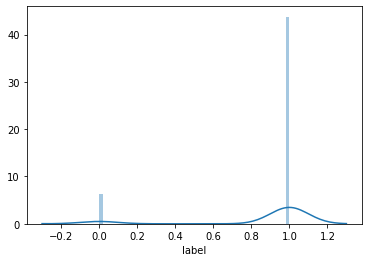

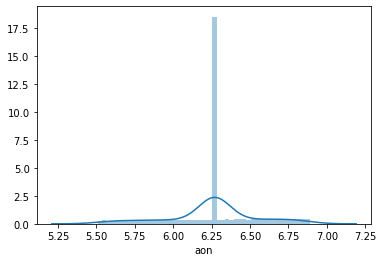

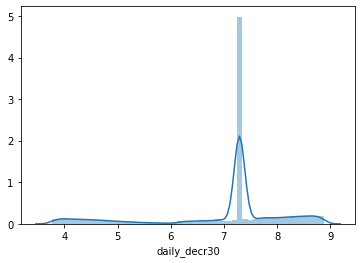

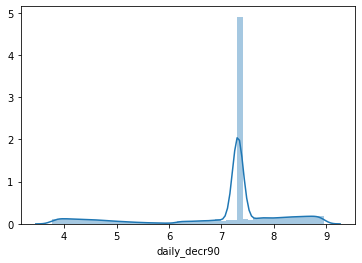

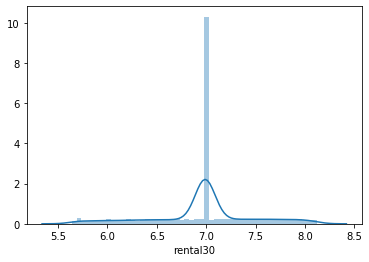

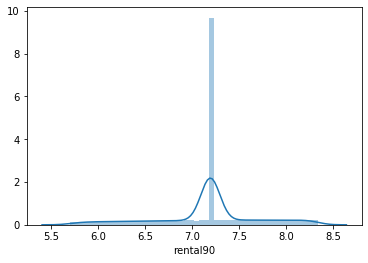

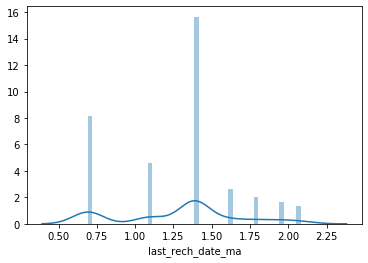

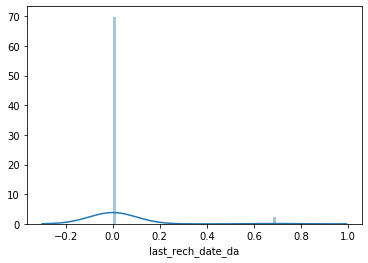

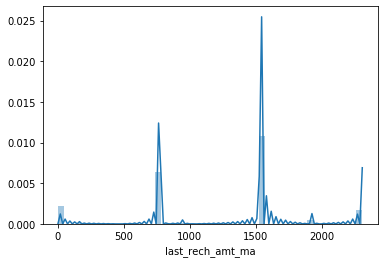

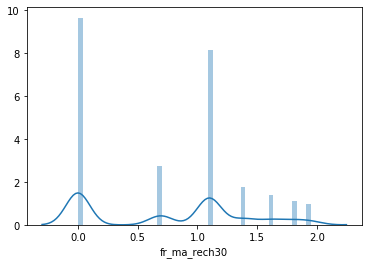

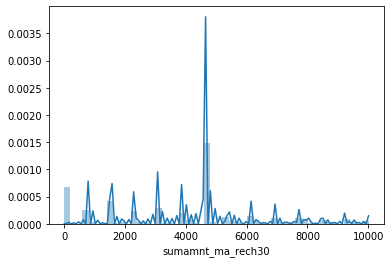

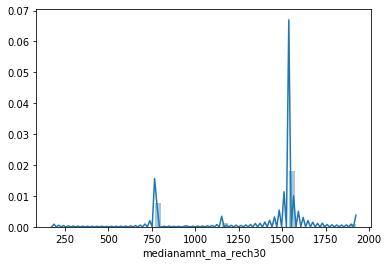

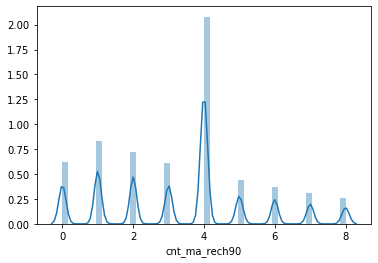

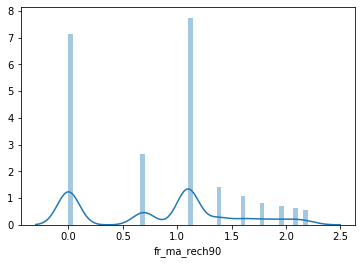

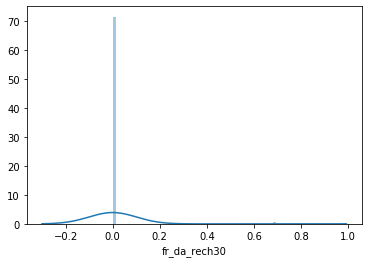

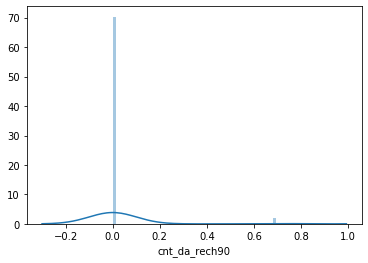

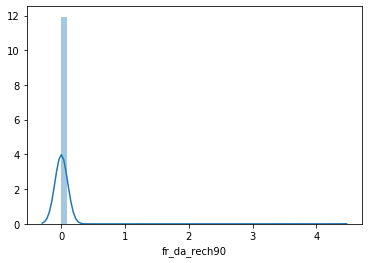

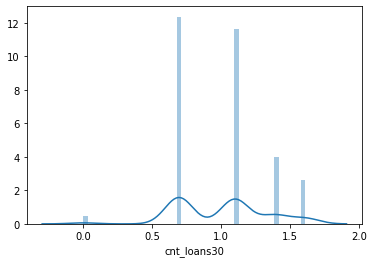

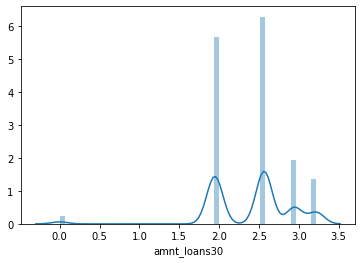

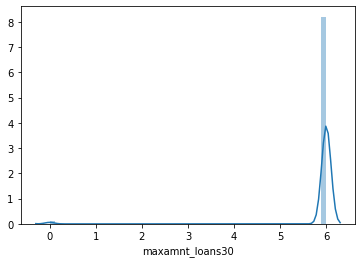

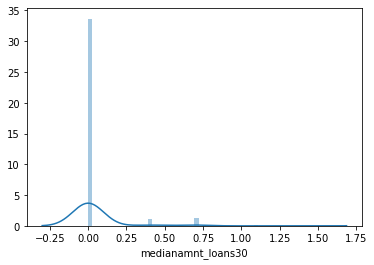

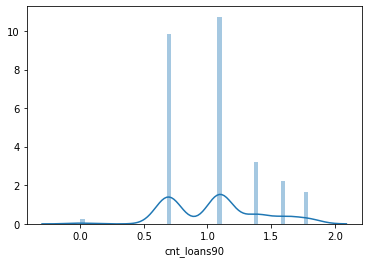

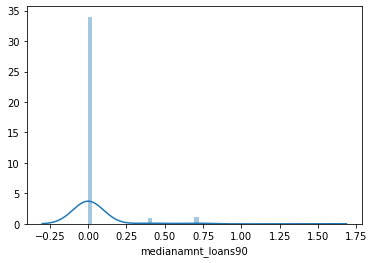

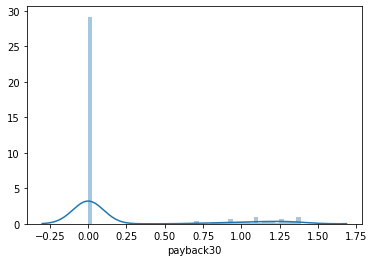

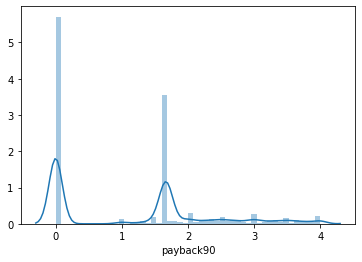

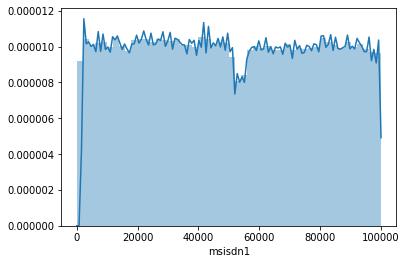

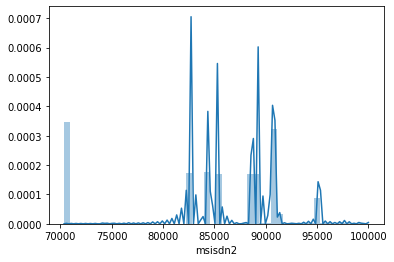

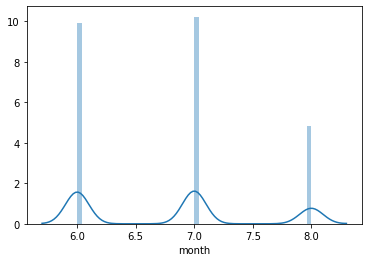

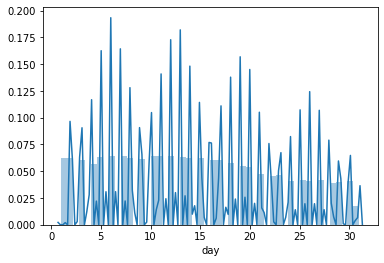

In [94]:
collist=loan.columns.values
ncol=15
nrow=10
for i in loan.columns:
    sns.distplot(loan[i],kde_kws={'bw':0.1})
    plt.show()

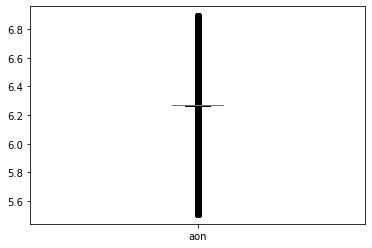

In [95]:
loan['aon'].plot.box()

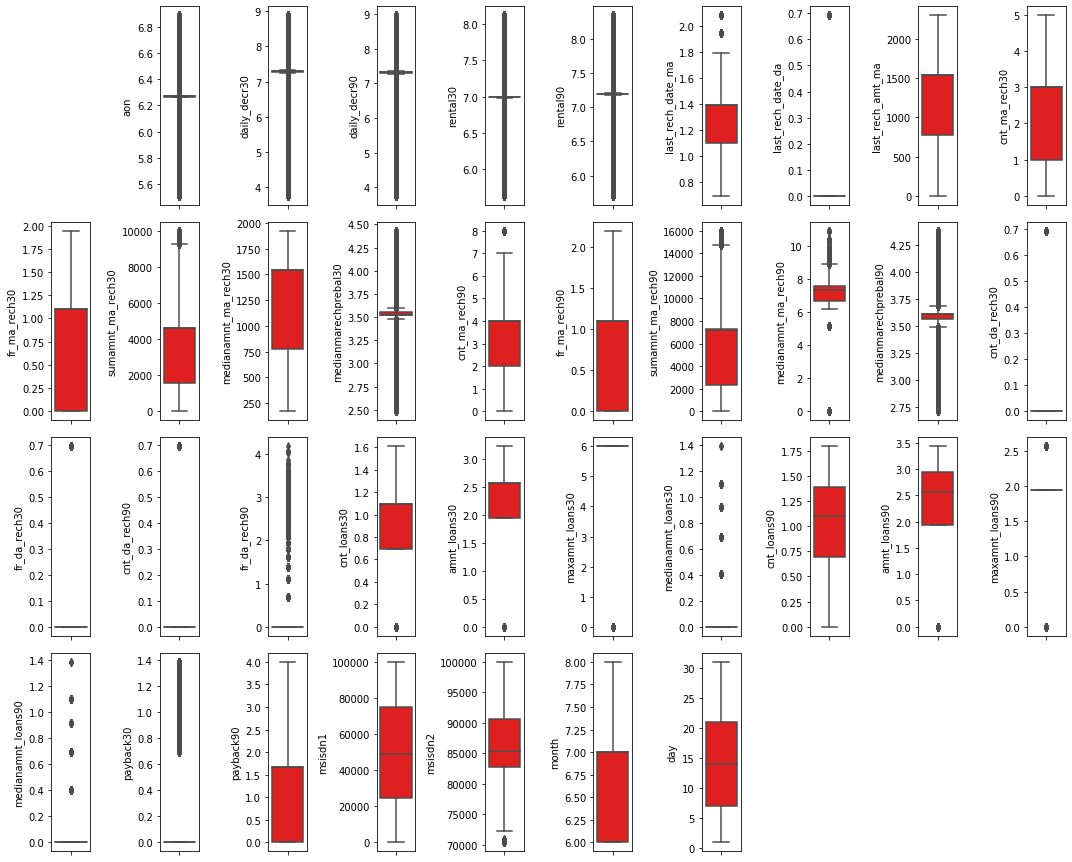

In [96]:
col=loan.columns.values
ncol=10
nrow=10

plt.figure(figsize=(15,30))
for i in  range(1,len(col)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(loan[col[i]],color='red',orient='v')
    plt.tight_layout()

## Removing Outliers

In [97]:
#Removing outliers
from scipy.stats import zscore
z_score=abs(zscore(loan))
print(loan.shape)
loan_crd=loan.loc[(z_score<3).all(axis=1)]
print(loan_crd.shape)

(209593, 37)
(189774, 37)


In [98]:
#Seprating into input and output variables
df_x=loan_crd.drop(['label'],axis=1)

In [99]:
y=pd.DataFrame(loan_crd['label'])

In [100]:
df_x.head()

aon  daily_decr30  daily_decr90  rental30  rental90  \
0  5.609472      8.024879      8.028178  6.988939  7.196687   
1  6.569481      7.293018      7.313887  6.988939  8.213994   
2  6.284134      7.243513      7.243513  6.803650  6.803650   
3  6.269096      7.293018      7.313887  6.988939  7.196687   
4  6.854355      5.021373      5.021373  7.002975  7.002975   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0           1.098612                0.0              1539              2   
1           1.386294                0.0              1539              1   
2           1.386294                0.0              1539              1   
3           1.386294                0.0               947              0   
4           1.609438                0.0              2309              3   

   fr_ma_rech30  ...  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0      1.098612  ...     1.098612      2.564949         1.945910   
1      0.000000  ...     0.693147      2.564949         2.564949   
2      0.000000  ...     0.693147      1.945910         1.945910   
3      0.000000  ...     1.098612      2.564949         1.945910   
4      1.098612  ...     1.098612      2.564949         1.945910   

   medianamnt_loans90  payback30  payback90  msisdn1  msisdn2  month  day  
0                 0.0   0.000000   1.666660    21408    70789      7   20  
1                 0.0   0.000000   0.000000    76462    70374      8   10  
2                 0.0   0.000000   0.000000    17943    70372      8   19  
3                 0.0   0.000000   0.000000    55773    70781      6    6  
4                 0.0   1.203973   2.333333     3813    82730      6   22  

[5 rows x 36 columns]

In [101]:
y.head()

label
0      0
1      1
2      1
3      1
4      1

In [102]:
#scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [103]:
x.shape

(189774, 36)

In [104]:
y.shape

(189774, 1)

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

### Applying cross_val_score to biased data to get better result

In [106]:
#Since our data is biased cross_val_score helps our model to train well and it also helps model not to over-fit or under-fit
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(), BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('Score of',m,'is:',score)
    print('Mean score:',score.mean())
    print('Standard deviation:',score.std())
    print('*******************************************************************************************************')
    print('\n')

Score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is: [0.87756554 0.87711764 0.8761428  0.87664339 0.87703536]
Mean score: 0.8769009460432542
Standard deviation: 0.00047912901334044085
*******************************************************************************************************


Score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, split

In [107]:
model=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(), BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Score:')
    print('accuracy_score :',accuracy_score(y_test,predm))
    print('confusion_matrix :',confusion_matrix(y_test,predm))
    print('classification_report',classification_report(y_test,predm))
    print('*******************************************************************************************************')
    print('\n')

Score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is: 0.8768467714844651
Score:
accuracy_score : 0.8766433934922935
confusion_matrix : [[  757  4214]
 [  468 32516]]
classification_report               precision    recall  f1-score   support

           0       0.62      0.15      0.24      4971
           1       0.89      0.99      0.93     32984

    accuracy                           0.88     37955
   macro avg       0.75      0.57      0.59     37955
weighted avg       0.85      0.88      0.84     37955

*******************************************************************************************************


Score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
          

#### Observation:
    * score of LogisticRegression        = 87%  and accuracy score = 87%
    * score of DecisionTreeClassifier    = 99%  and accuracy score = 84%
    * score of KNeighborsClassifier      = 90%  and accuracy score = 87%         
    * Score of RandomForestClassifier    = 99%  and accuracy socre = 88%
    * Score of AdaBoostClassifier        = 88%  and accuracy score = 88%
    * Score of GradientBoostingClassifier= 89%  and accuracy score = 89%
    * Score of BaggingClassifier         = 99%  and accuracy score = 87%
    * Score of ExtraTreesClassifier      = 99%  and accuracy score = 88%

Models like RandomForestClassifier and GradientBoostingClassifier are giving same accuracy score . But i am selecting GradientBoostingClassifier as our best model because of it's F1 score is high compare to other models

In [109]:
# GradientBoostingClassifier with best result
gbc=GradientBoostingClassifier(random_state=42)
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.8900013173494928
[[ 1879  3092]
 [ 1083 31901]]
              precision    recall  f1-score   support

           0       0.63      0.38      0.47      4971
           1       0.91      0.97      0.94     32984

    accuracy                           0.89     37955
   macro avg       0.77      0.67      0.71     37955
weighted avg       0.88      0.89      0.88     37955



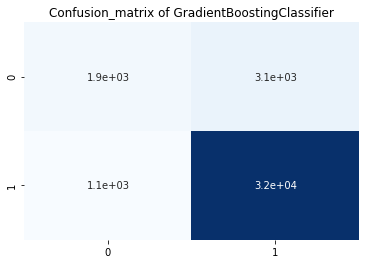

In [110]:
#plotting confusion matrix for GradientBoostingClassifier
cm=confusion_matrix(y_test,predgbc)
sns.heatmap(cm,annot=True,cbar=False,cmap='Blues')
plt.title("Confusion_matrix of GradientBoostingClassifier")
plt.show()

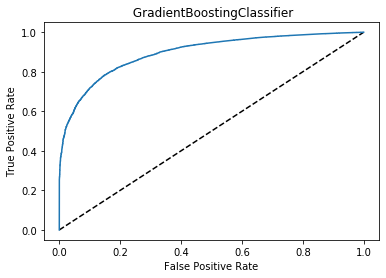

0.672579127140178


In [111]:
#AUC_ROC curve and finding auc score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=gbc.predict_proba(x_test)[:,1]
fpr,tpr,thredholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=' GradientBoostingClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' GradientBoostingClassifier')
plt.show()

auc_score=roc_auc_score(y_test,predgbc)
print(auc_score)

In [112]:
import joblib
#save the best model to a pickel in a file
joblib.dump(gbc,'Micro_credit.pkl')

['Micro_credit.pkl']